In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

DATA_FOLDER = 'Dataset/BeerAdvocate/'

BEERS_DATASET = DATA_FOLDER+"beers.csv"
BREWERIES_DATASET = DATA_FOLDER+"breweries.csv"
USERS_DATASET = DATA_FOLDER+"users.csv"

In [2]:
beers = pd.read_csv(BEERS_DATASET)
beers.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [3]:
breweries = pd.read_csv(BREWERIES_DATASET)
breweries.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [4]:
users = pd.read_csv(USERS_DATASET)
users.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [5]:
breweries_country = breweries.groupby('location')
breweries_country.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
...,...,...,...,...
16663,1927,"United States</a> | <a href=""http://maps.googl...",Il Vicino Wood Oven Pizza and Brewery,1
16676,28908,"Utah</a><br><a href=""http://utahbeers.com"" tar...",Utah Brewers Cooperative,128
16693,70,"United States</a> | <a href=""http://maps.googl...",Full Sail Brewing Company,0
16750,5025,Aruba,Cerbeseria Arubano,0


In [6]:
breweries_country.count().head()

,id,name,nbr_beers
location,,,
Albania,9,9,9
Algeria,8,8,8
Andorra,1,1,1
Angola,3,3,3
Antigua & Barbuda,1,1,1


In [7]:
nbr_beers_by_country = breweries_country['nbr_beers'].agg('count').sort_values(ascending=False)[:30]


Mainly Western (and rich) counties (USA, Western Europe, Canada, Australia)

Premier pays non-Occidental c'est le Brésil (13ème position mais 7ème pays le plus peuplé)

Correlation btw population of the country and nbr of beers 

Correlation btw wealth of the country and nbr of beers 

In [8]:
nbr_beers_by_country.index

Index(['Germany', 'England', 'United States, California', 'Canada',
       'United States, Washington', 'United States, New York',
       'United States, Colorado', 'France', 'Australia', 'Italy', 'Belgium',
       'United States, Pennsylvania', 'United States, Michigan', 'Spain',
       'United States, Florida', 'United States, Oregon',
       'United States, Texas', 'Russia', 'United States, Illinois',
       'Netherlands', 'United States, North Carolina',
       'United States, Virginia', 'United States, Ohio',
       'United States, Wisconsin', 'Austria', 'Brazil', 'Japan', 'Sweden',
       'United States, Minnesota', 'United States, Massachusetts'],
      dtype='object', name='location')

In [9]:
nbr_beers_by_country

location
Germany                          1431
England                           997
United States, California         929
Canada                            775
United States, Washington         411
United States, New York           406
United States, Colorado           404
France                            402
Australia                         401
Italy                             369
Belgium                           335
United States, Pennsylvania       328
United States, Michigan           321
Spain                             315
United States, Florida            297
United States, Oregon             295
United States, Texas              280
Russia                            268
United States, Illinois           266
Netherlands                       258
United States, North Carolina     249
United States, Virginia           229
United States, Ohio               225
United States, Wisconsin          219
Austria                           212
Brazil                            209
Jap

Text(0, 0.5, 'number of beers')

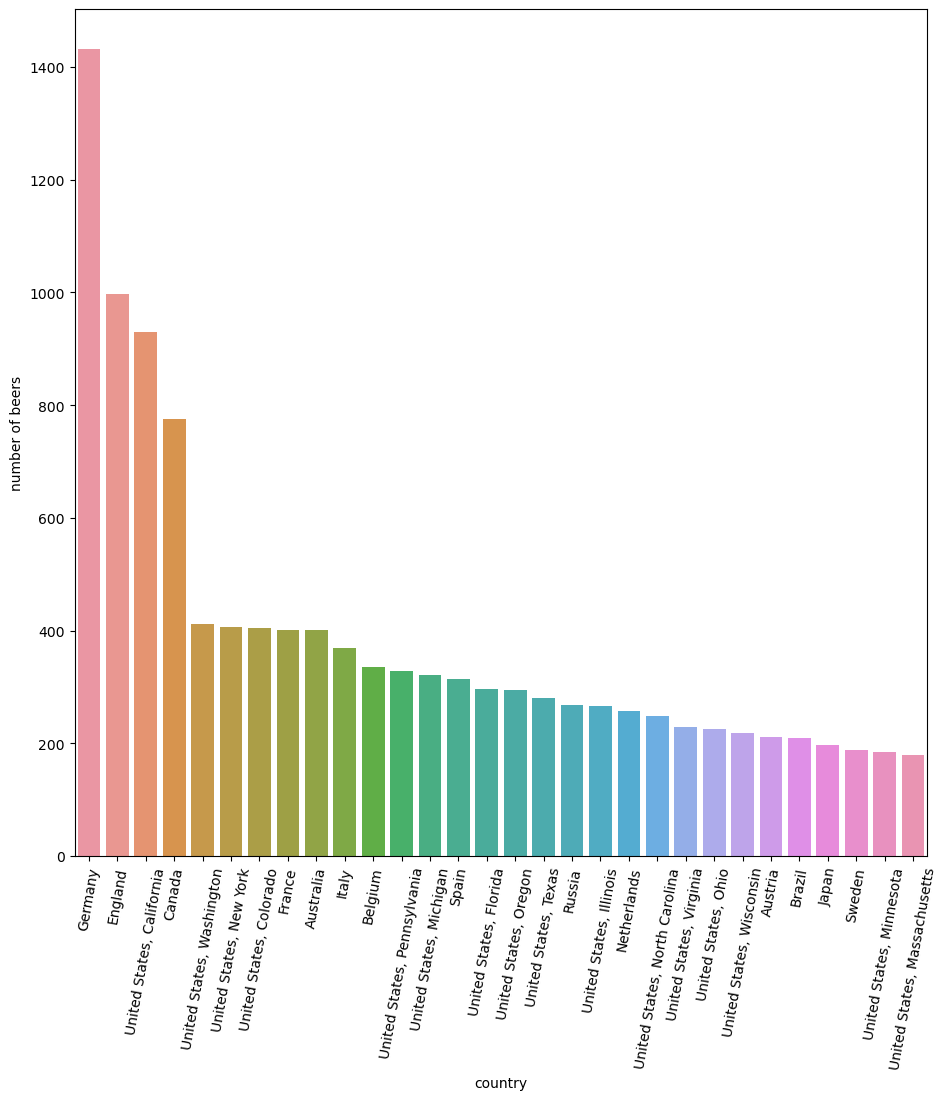

In [10]:
data_dict = {'country': nbr_beers_by_country.index, 'nbr_beer':nbr_beers_by_country.values}

plt.figure(figsize=(11,11))
ax = sns.barplot(x='country', y='nbr_beer', data=data_dict)
plt.xticks(rotation=80)
plt.xlabel('country')
plt.ylabel('number of beers')

In [11]:
beers_merged = pd.merge(beers, breweries, left_on='brewery_id', right_on='id')

In [12]:
beers_merged = beers_merged.drop(columns='id')


In [13]:
beers_merged.head(5)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,name,nbr_beers
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5


In [14]:
beers_merged[beers_merged.location == 'Zambia']

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,name,nbr_beers
11783,77779,Mosi,27113,Zambian National Breweries,American Adjunct Lager,9,2,2.13,NaN,NaN,4.0,2.618889,NaN,0,NaN,Zambia,Zambian National Breweries,3
11784,101595,Mosi Gold Export Lager,27113,Zambian National Breweries,American Adjunct Lager,1,0,2.50,NaN,NaN,5.0,2.500000,NaN,0,NaN,Zambia,Zambian National Breweries,3
11785,141720,Rhino Lager,27113,Zambian National Breweries,Euro Pale Lager,1,1,2.00,NaN,NaN,4.0,2.000000,NaN,0,NaN,Zambia,Zambian National Breweries,3


In [15]:
df = beers_merged.groupby('location').size()

In [16]:
df['Albania']

15

In [17]:
df1 = beers_merged.groupby(['location','style']).size()
df1

location  style                       
Albania   American Amber / Red Lager      1
          American Blonde Ale             1
          Czech Pilsener                  1
          Euro Dark Lager                 1
          Euro Pale Lager                 8
                                         ..
Zimbabwe  English India Pale Ale (IPA)    1
          English Pale Ale                1
          English Stout                   1
          Euro Pale Lager                 6
          Light Lager                     1
Length: 9977, dtype: int64

In [18]:
df2 = beers_merged.groupby(['location','style']).size().reset_index()
df2

,location,style,0
0,Albania,American Amber / Red Lager,1
1,Albania,American Blonde Ale,1
2,Albania,Czech Pilsener,1
3,Albania,Euro Dark Lager,1
4,Albania,Euro Pale Lager,8
...,...,...,...
9972,Zimbabwe,English India Pale Ale (IPA),1
9973,Zimbabwe,English Pale Ale,1
9974,Zimbabwe,English Stout,1
9975,Zimbabwe,Euro Pale Lager,6


In [19]:
df1['Albania']

style
American Amber / Red Lager    1
American Blonde Ale           1
Czech Pilsener                1
Euro Dark Lager               1
Euro Pale Lager               8
Hefeweizen                    1
Maibock / Helles Bock         1
Märzen / Oktoberfest          1
dtype: int64

In [20]:
dist_Alb = 100*df1['Albania']/df['Albania']
dist_Alb

style
American Amber / Red Lager     6.666667
American Blonde Ale            6.666667
Czech Pilsener                 6.666667
Euro Dark Lager                6.666667
Euro Pale Lager               53.333333
Hefeweizen                     6.666667
Maibock / Helles Bock          6.666667
Märzen / Oktoberfest           6.666667
dtype: float64

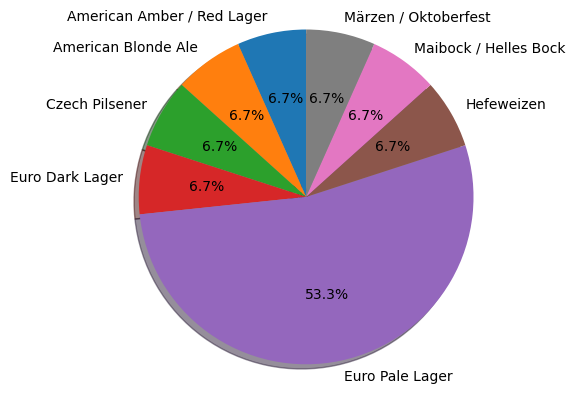

In [21]:
fig1, ax1 = plt.subplots()
ax1.pie(dist_Alb.values, labels=dist_Alb.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [22]:
df2[df2.location == 'Albania']

,location,style,0
0,Albania,American Amber / Red Lager,1
1,Albania,American Blonde Ale,1
2,Albania,Czech Pilsener,1
3,Albania,Euro Dark Lager,1
4,Albania,Euro Pale Lager,8
5,Albania,Hefeweizen,1
6,Albania,Maibock / Helles Bock,1
7,Albania,Märzen / Oktoberfest,1


In [23]:
100*df2[df2.location == 'Albania'][0]/df['Albania']

0     6.666667
1     6.666667
2     6.666667
3     6.666667
4    53.333333
5     6.666667
6     6.666667
7     6.666667
Name: 0, dtype: float64

In [24]:
#Where are users the most active (experts)

In [25]:
users_country = users.groupby('location')
users_country.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
152255,2,1,cba.76658,CBA,1.146305e+09,British Indian Ocean Territory
153341,1,1,paxfolksen.1079444,PaxFolksen,1.449745e+09,Sint Maarten
153359,2,0,stephanos.745564,stephanos,1.375178e+09,Tanzania
153361,1,0,josephyego.1114248,JosephYego,1.456571e+09,Kenya


In [26]:
nbr_users_country = users_country.size().sort_values(ascending=False)[:30]
nbr_users_country

location
United States, California        11638
United States, Pennsylvania       8689
United States, New York           7432
United States, Illinois           6866
United States, Massachusetts      6658
United States, Texas              5893
United States, Ohio               4776
United States, Florida            4604
United States, Michigan           4213
United States, New Jersey         3716
United States, Virginia           3604
United States, North Carolina     3405
Canada                            3324
United States, Washington         2891
United States, Minnesota          2854
United States, Connecticut        2792
United States, Indiana            2644
United States, Georgia            2633
United States, Wisconsin          2375
United States, Maryland           2335
United States, Colorado           2326
United States, Missouri           1703
United States, Oregon             1629
United States, Arizona            1317
United States, South Carolina     1309
United States, T

Text(0, 0.5, 'number of users')

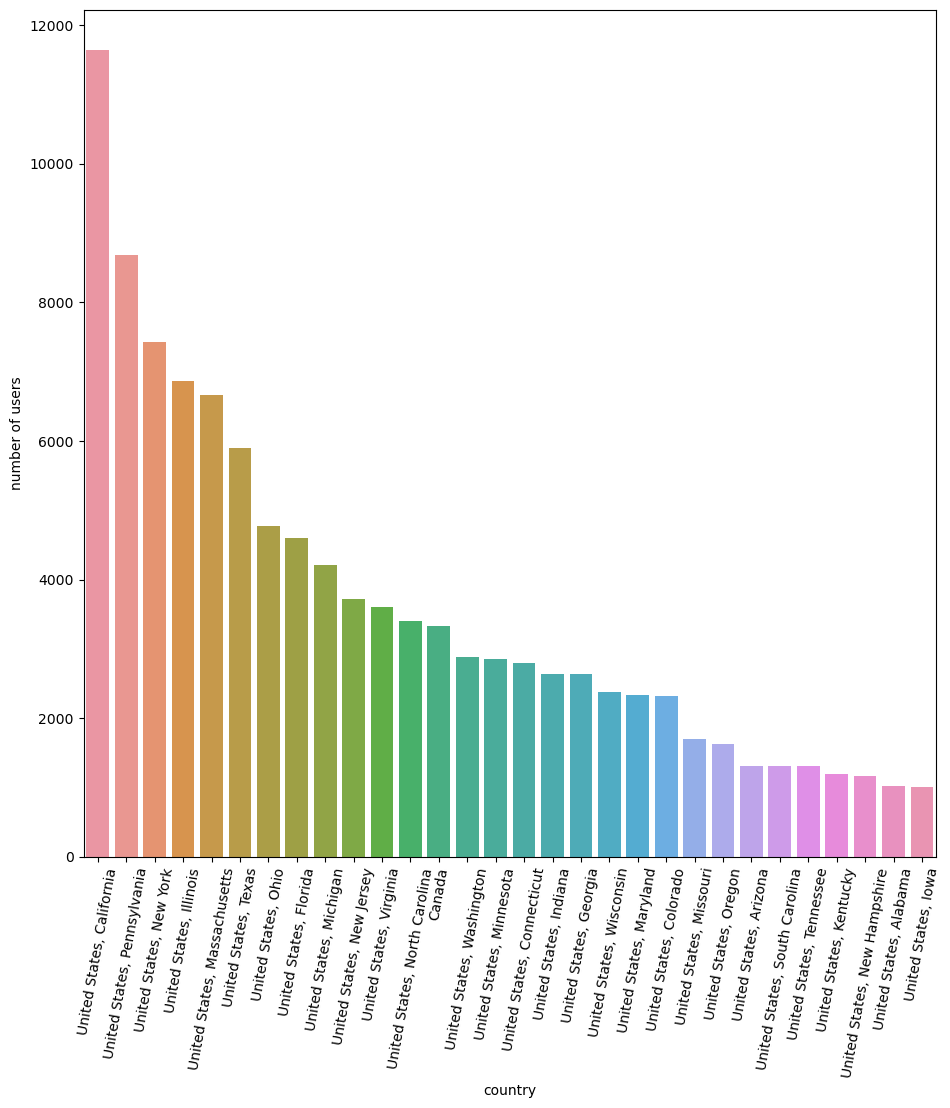

In [27]:
data_dict = {'country': nbr_users_country.index, 'nbr_users':nbr_users_country.values}

plt.figure(figsize=(11,11))
ax = sns.barplot(x='country', y='nbr_users', data=data_dict)
plt.xticks(rotation=80)
plt.xlabel('country')
plt.ylabel('number of users')

In [28]:
df4 = users_country.sum().sort_values(by = 'nbr_ratings', ascending=False)
df4

,nbr_ratings,nbr_reviews,joined
location,,,
"United States, California",658200,191166,1.567836e+13
"United States, Pennsylvania",654042,201864,1.156855e+13
"United States, Illinois",552906,136338,9.241737e+12
"United States, New York",492720,154911,1.000408e+13
"United States, Massachusetts",414197,132084,8.911678e+12
...,...,...,...
Senegal,1,0,1.451819e+09
Seychelles,1,0,1.374314e+09
Sint Maarten,1,1,1.449745e+09


In [29]:
df5 = users_country.mean().sort_values(by = 'nbr_ratings', ascending=False)
df5

,nbr_ratings,nbr_reviews,joined
location,,,
Jersey,1261.000000,374.000000,1.390734e+09
Lesotho,1153.000000,785.000000,1.203332e+09
Panama,274.115385,10.192308,1.386491e+09
Romania,267.031746,55.396825,1.410026e+09
Svalbard and Jan Mayen Islands,229.500000,57.000000,1.231931e+09
...,...,...,...
Mauritania,1.000000,1.000000,1.114942e+09
Nigeria,1.000000,1.000000,1.306490e+09
Senegal,1.000000,0.000000,1.451819e+09


In [30]:
df6 = users_country.median().sort_values(by = 'nbr_ratings', ascending=False)
df6

,nbr_ratings,nbr_reviews,joined
location,,,
Jersey,1261.0,374.0,1.390734e+09
Lesotho,1153.0,785.0,1.203332e+09
Svalbard and Jan Mayen Islands,229.5,57.0,1.231931e+09
Bolivia,223.0,28.5,1.337339e+09
Jordan,163.0,163.0,1.277374e+09
...,...,...,...
Kyrgyzstan,1.0,0.0,1.359630e+09
Gibraltar,1.0,1.0,1.275905e+09
Aruba,1.0,0.5,1.427150e+09


In [36]:
DATA_FOLDER2 = 'Dataset/matched_beer_data/'

RATINGS_DATASET = DATA_FOLDER2+"ratings.csv"

In [37]:
ratings = pd.read_csv(RATINGS_DATASET)
ratings.head()

/var/folders/xm/5j2wtkpd2fq69c8yqn8zhchr0000gn/T/ipykernel_14395/1449692808.py:1: DtypeWarning: Columns (0,1,2,3,5,7,8,9,10,11,13,17,18,19,20,22,24,25,26,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv(RATINGS_DATASET)


,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,...,rb.6,rb.7,rb.8,rb.9,rb.10,rb.11,rb.12,rb.13,rb.14,rb.15
0,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,...,brewery_name,date,overall,palate,rating,style,taste,text,user_id,user_name
1,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,...,Brasserie Rochefort,1387710000,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,83106,Erzengel
2,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,...,Myanmar Brewery and Distillery,1322564400,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",91324,visionthing
3,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1353582000,17.0,4.0,4.1,Lambic Style - Fruit,8.0,"Bottle @ One Pint Pub, Helsinki. Originally ra...",98624,tiong
4,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1416222000,16.0,4.0,4.1,Lambic Style - Unblended,9.0,"Draught @Â Pikkulintu, Helsinki, Finland. A pr...",98624,tiong


In [48]:
columns_ba = ratings.columns[['ba' in column for column in ratings.columns]]
ratings_ba = ratings[columns_ba]
ratings_ba.head()

In [51]:
columns_rb = ratings.columns[['rb' in column for column in ratings.columns]]
ratings_rb = ratings[columns_rb]
ratings_rb.head()

,rb,rb.1,rb.2,rb.3,rb.4,rb.5,rb.6,rb.7,rb.8,rb.9,rb.10,rb.11,rb.12,rb.13,rb.14,rb.15
0,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,style,taste,text,user_id,user_name
1,11.3,4.0,10.0,2360,Rochefort Trappistes 10,406,Brasserie Rochefort,1387710000,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,83106,Erzengel
2,5.0,2.0,3.0,17109,Myanmar Lager Beer,2921,Myanmar Brewery and Distillery,1322564400,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",91324,visionthing
3,5.0,4.0,8.0,35298,Cantillon Tyrnilambic Baie dArgousier,1069,Cantillon,1353582000,17.0,4.0,4.1,Lambic Style - Fruit,8.0,"Bottle @ One Pint Pub, Helsinki. Originally ra...",98624,tiong
4,5.0,4.0,8.0,113596,Cantillon Pikkulinnun Viskilambic,1069,Cantillon,1416222000,16.0,4.0,4.1,Lambic Style - Unblended,9.0,"Draught @Â Pikkulintu, Helsinki, Finland. A pr...",98624,tiong


In [63]:
ratings_merged_ba = pd.merge(ratings_ba, users, left_on='ba.15', right_on='user_id')
ratings_merged_ba = ratings_merged_ba.drop(columns='ba.15')
ratings_merged_ba.head()

,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,...,ba.12,ba.13,ba.14,ba.16,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,...,Quadrupel (Quad),5.0,Best before 27.07.2016Directly reviewed in com...,Erzengel,6,6,erzengel.248045,Erzengel,1.220868e+09,Germany
1,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,...,American Adjunct Lager,NaN,NaN,visionthing,11,0,visionthing.639993,visionthing,1.322737e+09,Estonia
2,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Lambic - Fruit,4.0,"Bottle @ One Pint Pub, Helsinki. 2006 vintage....",tiong,8,8,tiong.608427,tiong,1.309946e+09,Finland
3,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Lambic - Unblended,3.5,"Originally rated on 16.11.2009, draught @ Pikk...",tiong,8,8,tiong.608427,tiong,1.309946e+09,Finland
4,6.0,4.0,4.0,81125,Drie Fonteinen Oude Geuze - Armand & Tommy,2216,Brouwerij 3 Fonteinen,1346234400,4.0,4.0,...,Gueuze,4.0,"750ml bottle, originally rated on 18.8.2012.Bo...",tiong,8,8,tiong.608427,tiong,1.309946e+09,Finland


In [64]:
ratings_merged_ba = pd.merge(ratings_merged_ba, beers, left_on='ba.3', right_on='beer_id')
ratings_merged_ba = ratings_merged_ba.drop(columns='ba.3')
ratings_merged_ba.head()


,ba,ba.1,ba.2,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,ba.10,...,nbr_ratings_y,nbr_reviews_y,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,6.3,3.5,3.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1302343200,3.0,3.5,3.08,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
1,6.3,4.0,4.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1291201200,3.5,4.0,3.7,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
2,6.0,3.0,3.25,King Gose Home Imperial Gose,14879,Hoppin' Frog Brewery,1419937200,3.25,3.5,3.26,...,117,14,3.84,86.0,NaN,6.0,3.719231,-0.420429,15,3.796000
3,10.5,4.5,4.0,Sixteen,392,Weyerbacher Brewing Co.,1311415200,4.0,4.0,4.03,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615
4,10.5,3.5,4.5,Sixteen,392,Weyerbacher Brewing Co.,1309341600,4.0,4.0,3.89,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615


In [70]:
ratings_merged_ba_country = ratings_merged_ba.groupby('location')
ratings_merged_ba.head()

,ba,ba.1,ba.2,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,ba.10,...,nbr_ratings_y,nbr_reviews_y,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,6.3,3.5,3.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1302343200,3.0,3.5,3.08,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
1,6.3,4.0,4.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1291201200,3.5,4.0,3.7,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
2,6.0,3.0,3.25,King Gose Home Imperial Gose,14879,Hoppin' Frog Brewery,1419937200,3.25,3.5,3.26,...,117,14,3.84,86.0,NaN,6.0,3.719231,-0.420429,15,3.796000
3,10.5,4.5,4.0,Sixteen,392,Weyerbacher Brewing Co.,1311415200,4.0,4.0,4.03,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615
4,10.5,3.5,4.5,Sixteen,392,Weyerbacher Brewing Co.,1309341600,4.0,4.0,3.89,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615


In [65]:
ratings_merged_ba_country_style = ratings_merged_ba.groupby(['location','style'])
ratings_merged_ba_country_style.head()

,ba,ba.1,ba.2,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,ba.10,...,nbr_ratings_y,nbr_reviews_y,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,6.3,3.5,3.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1302343200,3.0,3.5,3.08,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
1,6.3,4.0,4.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1291201200,3.5,4.0,3.7,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
2,6.0,3.0,3.25,King Gose Home Imperial Gose,14879,Hoppin' Frog Brewery,1419937200,3.25,3.5,3.26,...,117,14,3.84,86.0,NaN,6.0,3.719231,-0.420429,15,3.796000
3,10.5,4.5,4.0,Sixteen,392,Weyerbacher Brewing Co.,1311415200,4.0,4.0,4.03,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615
4,10.5,3.5,4.5,Sixteen,392,Weyerbacher Brewing Co.,1309341600,4.0,4.0,3.89,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5574,6.4,NaN,NaN,Pill Hill Vanilla Porter,36419,51st Ward Beer Company,1416826800,NaN,NaN,4.5,...,32,6,3.96,86.0,NaN,6.4,3.886563,-0.109176,7,3.974286
5577,5.5,NaN,NaN,Dark 'n Curvy,1151,Piece Brewery & Pizzeria,1397642400,NaN,NaN,4.25,...,73,22,3.92,86.0,NaN,5.5,3.998904,0.197924,22,3.907273
5578,6.5,4.0,3.5,Vlasbier,634,Brouwerij Van Eecke N.V.,1230548400,1.5,2.0,2.58,...,17,11,3.44,82.0,NaN,6.5,3.486471,-0.624192,11,3.327273
5579,8.5,4.5,3.5,Valeir Divers,3463,Brouwerij Contreras,1323946800,4.0,4.0,3.91,...,48,25,3.77,84.0,NaN,8.5,3.742500,-0.207188,25,3.823200


In [66]:
ratings_merged_ba_country_style.size()

location                  style                         
Australia                 American Amber / Red Ale          1
                          American Amber / Red Lager        1
                          American Blonde Ale               2
                          American Double / Imperial IPA    2
                          American IPA                      5
                                                           ..
United States, Wisconsin  Saison / Farmhouse Ale            2
                          Schwarzbier                       1
                          Scotch Ale / Wee Heavy            1
                          Tripel                            1
                          Weizenbock                        1
Length: 1724, dtype: int64